# Sophisticated 3 Body stable orbits

14th of March 2023 - in this section we will be attempting to find stable orbit for the 3 body problem. This is done by setting up different initial condition and propagate the initial condition using Velocity Verlet method. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def force(r1,r2,m1,m2):
    """Force function is define to be used repeatly throughout the mini-projection 
    to calculate the force of one body on other body.
    
    Inputs:
    r1 - position of mass 1
    r2 - position of mass 2
    m1 - mass 1
    m2 - mass 2
    # G is defined outside of this function
    
    Returns:
    Force - force experienced by mass 1
    
    """
    # Find r_12 and its magnitude
    r12 = r2 - r1
    
    
    mag_r12 = np.linalg.norm(r2-r1) # np.linalg.norm helps to find the magnitude of a vector
    f_on_m1 = G*m1*m2*r12/(mag_r12**3)
    return f_on_m1

## Stable orbit 1

In [3]:
m1 = 1
m2 = 1   # mass 2
m3 = 1 # lightest mass 3
N= 3000
Ndim=2
G=1
dt=0.001
# Storage for positions, velocities 
# Obj_2 - position of the second object
# Obj_3 - position of the third and lightest object
Obj_1_r = np.zeros((N,Ndim))
Obj_1_v = np.zeros((N,Ndim))

Obj_2_r = np.zeros((N,Ndim))
Obj_3_r = np.zeros((N,Ndim))

Obj_2_v= np.zeros(( N ,Ndim  ))
Obj_3_v = np.zeros(( N ,Ndim  ))


# Total energy and angular momentum storage

KE_LS= np.zeros(N)
PE_LS= np.zeros(N)
L_LS= np.zeros(N)

# Initial condition explanations
'''
Initial condition
'''
Obj_1_r[0] = np.array([-0.0347,1.1856])
Obj_2_r[0] = np.array([0.2693,-1.0020])
Obj_3_r[0] = np.array([-0.2328,-0.5978])

     
Obj_1_v[0] = np.array([0.2495,-0.1076])
Obj_2_v[0] = np.array([0.2059,-0.9396])
Obj_3_v[0] = np.array([-0.4553,1.0471])

In [4]:
for i in range(N-1):
    # Forces on objects at step i
    Force_on_1 = force(Obj_1_r[i], Obj_2_r[i], m1 , m2) + force(Obj_1_r[i],Obj_3_r[i],m1,m3)
    Force_on_2 = force(Obj_2_r[i], Obj_1_r[i], m1 , m2) + force(Obj_2_r[i],Obj_3_r[i],m2,m3)
    Force_on_3 = force(Obj_3_r[i], Obj_1_r[i], m1 , m3) + force(Obj_3_r[i],Obj_2_r[i],m2,m3)
    
    
    # updating position using velocity Verlet Integrator
    Obj_1_r[i+1] = Obj_1_r[i] + (dt* Obj_1_v[i]) + (dt**2) * (Force_on_1/(2*m1))
    Obj_2_r[i+1] = Obj_2_r[i] + (dt* Obj_2_v[i]) + (dt**2) * (Force_on_2/(2*m2))
    Obj_3_r[i+1] = Obj_3_r[i] + (dt* Obj_3_v[i]) + (dt**2) * (Force_on_3/(2*m3))
    
    # Forces on objects at step i+1
    Force_on_1_ip1 = force(Obj_1_r[i+1], Obj_2_r[i+1], m1 , m2) + force(Obj_1_r[i+1],Obj_3_r[i+1],m1,m3)
    Force_on_2_ip1 = force(Obj_2_r[i+1], Obj_1_r[i+1], m1 , m2) + force(Obj_2_r[i+1],Obj_3_r[i+1],m2,m3)
    Force_on_3_ip1 = force(Obj_3_r[i+1], Obj_1_r[i+1], m1 , m3) + force(Obj_3_r[i+1],Obj_2_r[i+1],m2,m3)
    
    

    #updating velocity using velocity Verlet Integrator
    Obj_1_v[i+1] = Obj_1_v[i] + dt*(Force_on_1+Force_on_1_ip1)/(2*m1)
    Obj_2_v[i+1] = Obj_2_v[i] + dt*(Force_on_2+Force_on_2_ip1)/(2*m2)
    Obj_3_v[i+1] = Obj_3_v[i] + dt*(Force_on_3+Force_on_3_ip1)/(2*m3)
    
    # Kinetic Energy Calculation
    KE_LS[i]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[i])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[i])**2))
               +(0.5 * (m2*np.linalg.norm(Obj_2_v[i])**2)))
    
    # Potential Energy Calculation
    
    PE_LS[i]= ((-G*m1*m2/ np.linalg.norm(Obj_2_r[i]-Obj_1_r[i]) ) +(-G*m1*m3/ np.linalg.norm(Obj_3_r[i]-Obj_1_r[i]) )
          + (-G*m2*m1/ np.linalg.norm(Obj_1_r[i]-Obj_2_r[i]) ) +(-G*m2*m3/ np.linalg.norm(Obj_3_r[i]-Obj_2_r[i]) )
          + (-G*m3*m1/ np.linalg.norm(Obj_3_r[i]-Obj_1_r[i]) ) +(-G*m2*m3/ np.linalg.norm(Obj_2_r[i]-Obj_3_r[i]) ))

    L_LS[i] =( m1 * np.linalg.norm(Obj_1_r[i]) * np.linalg.norm(Obj_1_v[i])
                + m2 * np.linalg.norm(Obj_2_r[i]) * np.linalg.norm(Obj_2_v[i])
                + m3 * np.linalg.norm(Obj_3_r[i]) * np.linalg.norm(Obj_3_v[i]))
    
    
# Manually setting the last element in the KE, PE and angular momentum array as the loop ends at the second last element
KE_LS[-1]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[-1])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[-1])**2)) +(0.5 * (m2*np.linalg.norm(Obj_2_v[-1])**2)))

PE_LS[-1]= ((-G*m1*m2/ np.linalg.norm(Obj_2_r[-1]-Obj_1_r[-1]) ) +(-G*m1*m3/ np.linalg.norm(Obj_3_r[-1]-Obj_1_r[-1]) )
          + (-G*m2*m1/ np.linalg.norm(Obj_1_r[-1]-Obj_2_r[-1]) ) +(-G*m2*m3/ np.linalg.norm(Obj_3_r[-1]-Obj_2_r[-1]) )
          + (-G*m3*m1/ np.linalg.norm(Obj_3_r[-1]-Obj_1_r[-1]) ) +(-G*m2*m3/ np.linalg.norm(Obj_2_r[-1]-Obj_3_r[-1]) ))

L_LS[-1] =( m1 * np.linalg.norm(Obj_1_r[-1]) * np.linalg.norm(Obj_1_v[-1])
                + m2 * np.linalg.norm(Obj_2_r[-1]) * np.linalg.norm(Obj_2_v[-1])
                + m3 * np.linalg.norm(Obj_3_r[-1]) * np.linalg.norm(Obj_3_v[-1]))


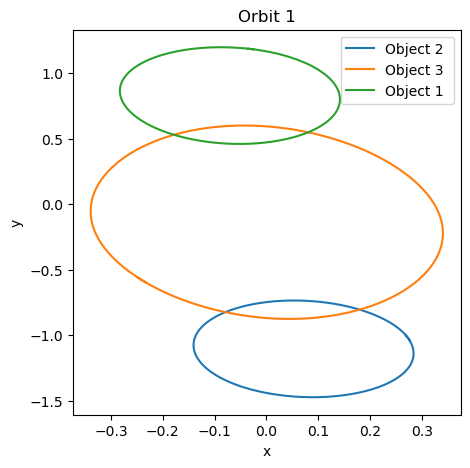

In [5]:
#Plotting the particle's paths and velocity 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.plot(Obj_2_r[:,0],Obj_2_r[:,1],label='Object 2')
ax.plot(Obj_3_r[:,0],Obj_3_r[:,1],label='Object 3 ')
ax.plot(Obj_1_r[:,0],Obj_1_r[:,1],label='Object 1')
ax.set_title('Orbit 1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()



## Stable orbit 2

In [6]:
m1 = 1
m2 = 1   # mass 2
m3 = 1 # lightest mass 3
N= 30000
Ndim=2
G=1
dt=0.001
# Storage for positions, velocities 
# Obj_2 - position of the second object
# Obj_3 - position of the third and lightest object
Obj_1_r = np.zeros((N,Ndim))
Obj_1_v = np.zeros((N,Ndim))

Obj_2_r = np.zeros((N,Ndim))
Obj_3_r = np.zeros((N,Ndim))

Obj_2_v= np.zeros(( N ,Ndim  ))
Obj_3_v = np.zeros(( N ,Ndim  ))


# Total energy and angular momentum storage

KE_LS= np.zeros(N)
PE_LS= np.zeros(N)
L_LS= np.zeros(N)

# Initial condition explanations
''' Initial condition'''


Obj_1_r[0] = np.array([-0.602885898116520,1.059162128863347 *10**-1])
Obj_2_r[0] = np.array([0.252709795391000,1.058254872224370 *10**-1])
Obj_3_r[0] = np.array([-0.355389016941814,1.038323764315145 *10**-1])
          
Obj_1_v[0] = np.array([0.122913546623784,0.747443868604908])
Obj_2_v[0] = np.array([-0.019325586404545,1.369241993562101])
Obj_3_v[0] = np.array([-0.103587960218793,-2.116685862168820])

In [7]:
for i in range(N-1):
    # Forces on objects at step i
    Force_on_1 = force(Obj_1_r[i], Obj_2_r[i], m1 , m2) + force(Obj_1_r[i],Obj_3_r[i],m1,m3)
    Force_on_2 = force(Obj_2_r[i], Obj_1_r[i], m1 , m2) + force(Obj_2_r[i],Obj_3_r[i],m2,m3)
    Force_on_3 = force(Obj_3_r[i], Obj_1_r[i], m1 , m3) + force(Obj_3_r[i],Obj_2_r[i],m2,m3)
    
    
    # updating position using velocity Verlet Integrator
    Obj_1_r[i+1] = Obj_1_r[i] + (dt* Obj_1_v[i]) + (dt**2) * (Force_on_1/(2*m1))
    Obj_2_r[i+1] = Obj_2_r[i] + (dt* Obj_2_v[i]) + (dt**2) * (Force_on_2/(2*m2))
    Obj_3_r[i+1] = Obj_3_r[i] + (dt* Obj_3_v[i]) + (dt**2) * (Force_on_3/(2*m3))
    
    # Forces on objects at step i+1
    Force_on_1_ip1 = force(Obj_1_r[i+1], Obj_2_r[i+1], m1 , m2) + force(Obj_1_r[i+1],Obj_3_r[i+1],m1,m3)
    Force_on_2_ip1 = force(Obj_2_r[i+1], Obj_1_r[i+1], m1 , m2) + force(Obj_2_r[i+1],Obj_3_r[i+1],m2,m3)
    Force_on_3_ip1 = force(Obj_3_r[i+1], Obj_1_r[i+1], m1 , m3) + force(Obj_3_r[i+1],Obj_2_r[i+1],m2,m3)
    
    

    #updating velocity using velocity Verlet Integrator
    Obj_1_v[i+1] = Obj_1_v[i] + dt*(Force_on_1+Force_on_1_ip1)/(2*m1)
    Obj_2_v[i+1] = Obj_2_v[i] + dt*(Force_on_2+Force_on_2_ip1)/(2*m2)
    Obj_3_v[i+1] = Obj_3_v[i] + dt*(Force_on_3+Force_on_3_ip1)/(2*m3)
    
    # Kinetic Energy Calculation
    KE_LS[i]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[i])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[i])**2))
               +(0.5 * (m2*np.linalg.norm(Obj_2_v[i])**2)))
    
    # Potential Energy Calculation
    
    PE_LS[i]= ((-G*m1*m2/ np.linalg.norm(Obj_2_r[i]-Obj_1_r[i]) ) +(-G*m1*m3/ np.linalg.norm(Obj_3_r[i]-Obj_1_r[i]) )
          + (-G*m2*m1/ np.linalg.norm(Obj_1_r[i]-Obj_2_r[i]) ) +(-G*m2*m3/ np.linalg.norm(Obj_3_r[i]-Obj_2_r[i]) )
          + (-G*m3*m1/ np.linalg.norm(Obj_3_r[i]-Obj_1_r[i]) ) +(-G*m2*m3/ np.linalg.norm(Obj_2_r[i]-Obj_3_r[i]) ))

    L_LS[i] =( m1 * np.linalg.norm(Obj_1_r[i]) * np.linalg.norm(Obj_1_v[i])
                + m2 * np.linalg.norm(Obj_2_r[i]) * np.linalg.norm(Obj_2_v[i])
                + m3 * np.linalg.norm(Obj_3_r[i]) * np.linalg.norm(Obj_3_v[i]))
    
    
# Manually setting the last element in the KE, PE and angular momentum array as the loop ends at the second last element
KE_LS[-1]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[-1])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[-1])**2)) +(0.5 * (m2*np.linalg.norm(Obj_2_v[-1])**2)))

PE_LS[-1]= ((-G*m1*m2/ np.linalg.norm(Obj_2_r[-1]-Obj_1_r[-1]) ) +(-G*m1*m3/ np.linalg.norm(Obj_3_r[-1]-Obj_1_r[-1]) )
          + (-G*m2*m1/ np.linalg.norm(Obj_1_r[-1]-Obj_2_r[-1]) ) +(-G*m2*m3/ np.linalg.norm(Obj_3_r[-1]-Obj_2_r[-1]) )
          + (-G*m3*m1/ np.linalg.norm(Obj_3_r[-1]-Obj_1_r[-1]) ) +(-G*m2*m3/ np.linalg.norm(Obj_2_r[-1]-Obj_3_r[-1]) ))

L_LS[-1] =( m1 * np.linalg.norm(Obj_1_r[-1]) * np.linalg.norm(Obj_1_v[-1])
                + m2 * np.linalg.norm(Obj_2_r[-1]) * np.linalg.norm(Obj_2_v[-1])
                + m3 * np.linalg.norm(Obj_3_r[-1]) * np.linalg.norm(Obj_3_v[-1]))


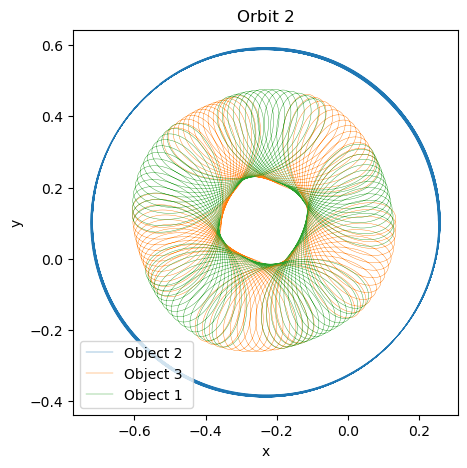

In [8]:
#Plotting the particle's paths and velocity 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.plot(Obj_2_r[:,0],Obj_2_r[:,1],label='Object 2 ',lw=0.3)
ax.plot(Obj_3_r[:,0],Obj_3_r[:,1],label='Object 3',lw=0.3)
ax.plot(Obj_1_r[:,0],Obj_1_r[:,1],label='Object 1',lw=0.3)
ax.set_title('Orbit 2')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best')
plt.gca().set_aspect(1)

## 20th of March 2023
## Stable orbit 3

In [9]:
m1 = 1
m2 = 1   # mass 2
m3 = 1 # lightest mass 3
N= 30000
Ndim=2
G=1
dt=0.001
# Storage for positions, velocities 
# Obj_2 - position of the second object
# Obj_3 - position of the third and lightest object
Obj_1_r = np.zeros((N,Ndim))
Obj_1_v = np.zeros((N,Ndim))

Obj_2_r = np.zeros((N,Ndim))
Obj_3_r = np.zeros((N,Ndim))

Obj_2_v= np.zeros(( N ,Ndim  ))
Obj_3_v = np.zeros(( N ,Ndim  ))


# Total energy and angular momentum storage

KE_LS= np.zeros(N)
PE_LS= np.zeros(N)
L_LS= np.zeros(N)

# remember that the initial centre of mass is r1_v[0]

# Initial condition explanations
''' Initial condition'''


Obj_1_r[0] = np.array([-0.602885898116520,1.059162128863347 -1])
Obj_2_r[0] = np.array([0.252709795391000,1.058254872224370-1])
Obj_3_r[0] = np.array([-0.355389016941814,1.038323764315145 -1])
          
Obj_1_v[0] = np.array([0.122913546623784,0.747443868604908])
Obj_2_v[0] = np.array([-0.019325586404545,1.369241993562101])
Obj_3_v[0] = np.array([-0.103587960218793,-2.116685862168820])

In [10]:
for i in range(N-1):
    # Forces on objects at step i
    Force_on_1 = force(Obj_1_r[i], Obj_2_r[i], m1 , m2) + force(Obj_1_r[i],Obj_3_r[i],m1,m3)
    Force_on_2 = force(Obj_2_r[i], Obj_1_r[i], m1 , m2) + force(Obj_2_r[i],Obj_3_r[i],m2,m3)
    Force_on_3 = force(Obj_3_r[i], Obj_1_r[i], m1 , m3) + force(Obj_3_r[i],Obj_2_r[i],m2,m3)
    
    
    # updating position using velocity Verlet Integrator
    Obj_1_r[i+1] = Obj_1_r[i] + (dt* Obj_1_v[i]) + (dt**2) * (Force_on_1/(2*m1))
    Obj_2_r[i+1] = Obj_2_r[i] + (dt* Obj_2_v[i]) + (dt**2) * (Force_on_2/(2*m2))
    Obj_3_r[i+1] = Obj_3_r[i] + (dt* Obj_3_v[i]) + (dt**2) * (Force_on_3/(2*m3))
    
    # Forces on objects at step i+1
    Force_on_1_ip1 = force(Obj_1_r[i+1], Obj_2_r[i+1], m1 , m2) + force(Obj_1_r[i+1],Obj_3_r[i+1],m1,m3)
    Force_on_2_ip1 = force(Obj_2_r[i+1], Obj_1_r[i+1], m1 , m2) + force(Obj_2_r[i+1],Obj_3_r[i+1],m2,m3)
    Force_on_3_ip1 = force(Obj_3_r[i+1], Obj_1_r[i+1], m1 , m3) + force(Obj_3_r[i+1],Obj_2_r[i+1],m2,m3)
    
    

    #updating velocity using velocity Verlet Integrator
    Obj_1_v[i+1] = Obj_1_v[i] + dt*(Force_on_1+Force_on_1_ip1)/(2*m1)
    Obj_2_v[i+1] = Obj_2_v[i] + dt*(Force_on_2+Force_on_2_ip1)/(2*m2)
    Obj_3_v[i+1] = Obj_3_v[i] + dt*(Force_on_3+Force_on_3_ip1)/(2*m3)
    
    # Kinetic Energy Calculation
    KE_LS[i]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[i])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[i])**2))
               +(0.5 * (m2*np.linalg.norm(Obj_2_v[i])**2)))
    
    # Potential Energy Calculation
    
    PE_LS[i]= ((-G*m1*m2/ np.linalg.norm(Obj_2_r[i]-Obj_1_r[i]) ) +(-G*m1*m3/ np.linalg.norm(Obj_3_r[i]-Obj_1_r[i]) )
          + (-G*m2*m1/ np.linalg.norm(Obj_1_r[i]-Obj_2_r[i]) ) +(-G*m2*m3/ np.linalg.norm(Obj_3_r[i]-Obj_2_r[i]) )
          + (-G*m3*m1/ np.linalg.norm(Obj_3_r[i]-Obj_1_r[i]) ) +(-G*m2*m3/ np.linalg.norm(Obj_2_r[i]-Obj_3_r[i]) ))

    L_LS[i] =( m1 * np.linalg.norm(Obj_1_r[i]) * np.linalg.norm(Obj_1_v[i])
                + m2 * np.linalg.norm(Obj_2_r[i]) * np.linalg.norm(Obj_2_v[i])
                + m3 * np.linalg.norm(Obj_3_r[i]) * np.linalg.norm(Obj_3_v[i]))
    
    
# Manually setting the last element in the KE, PE and angular momentum array as the loop ends at the second last element
KE_LS[-1]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[-1])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[-1])**2)) +(0.5 * (m2*np.linalg.norm(Obj_2_v[-1])**2)))

PE_LS[-1]= ((-G*m1*m2/ np.linalg.norm(Obj_2_r[-1]-Obj_1_r[-1]) ) +(-G*m1*m3/ np.linalg.norm(Obj_3_r[-1]-Obj_1_r[-1]) )
          + (-G*m2*m1/ np.linalg.norm(Obj_1_r[-1]-Obj_2_r[-1]) ) +(-G*m2*m3/ np.linalg.norm(Obj_3_r[-1]-Obj_2_r[-1]) )
          + (-G*m3*m1/ np.linalg.norm(Obj_3_r[-1]-Obj_1_r[-1]) ) +(-G*m2*m3/ np.linalg.norm(Obj_2_r[-1]-Obj_3_r[-1]) ))

L_LS[-1] =( m1 * np.linalg.norm(Obj_1_r[-1]) * np.linalg.norm(Obj_1_v[-1])
                + m2 * np.linalg.norm(Obj_2_r[-1]) * np.linalg.norm(Obj_2_v[-1])
                + m3 * np.linalg.norm(Obj_3_r[-1]) * np.linalg.norm(Obj_3_v[-1]))


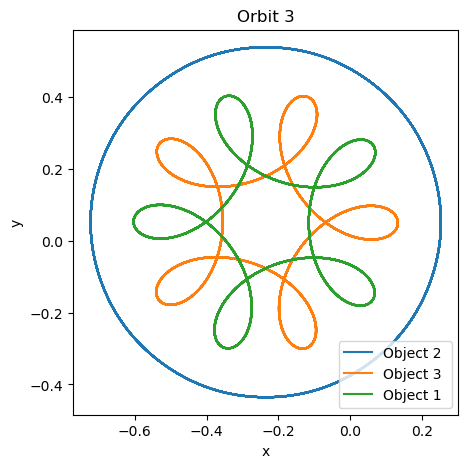

In [11]:
#Plotting the particle's paths and velocity 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.plot(Obj_2_r[:,0],Obj_2_r[:,1],label='Object 2 ')
ax.plot(Obj_3_r[:,0],Obj_3_r[:,1],label='Object 3 ')
ax.plot(Obj_1_r[:,0],Obj_1_r[:,1],label='Object 1')
ax.set_title('Orbit 3')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best')
plt.gca().set_aspect(1)

## Stable orbit 4

In [12]:
m1 = 1
m2 = 1   # mass 2
m3 = 1 # lightest mass 3
N= 90000
Ndim=2
G=1
dt=0.001
# Storage for positions, velocities 
# Obj_2 - position of the second object
# Obj_3 - position of the third and lightest object
Obj_1_r = np.zeros((N,Ndim))
Obj_1_v = np.zeros((N,Ndim))

Obj_2_r = np.zeros((N,Ndim))
Obj_3_r = np.zeros((N,Ndim))

Obj_2_v= np.zeros(( N ,Ndim  ))
Obj_3_v = np.zeros(( N ,Ndim  ))


# Total energy and angular momentum storage

KE_LS= np.zeros(N)
PE_LS= np.zeros(N)
L_LS= np.zeros(N)

# Initial condition explanations
''' Initial condition'''

Obj_1_r[0] = np.array([0.517216786720872,0.556100331579180])
Obj_2_r[0] = np.array([0.002573889407142,0.116484954113653])
Obj_3_r[0] = np.array([-0.202555349022110,-0.731794952123173])

     
Obj_1_v[0] = np.array([0.107632564012758,0.681725256843756])
Obj_2_v[0] = np.array([-0.534918980283418,-0.854885322576851])
Obj_3_v[0] = np.array([0.427286416269208,0.173160065733631])

In [13]:
for i in range(N-1):
    # Forces on objects at step i
    Force_on_1 = force(Obj_1_r[i], Obj_2_r[i], m1 , m2) + force(Obj_1_r[i],Obj_3_r[i],m1,m3)
    Force_on_2 = force(Obj_2_r[i], Obj_1_r[i], m1 , m2) + force(Obj_2_r[i],Obj_3_r[i],m2,m3)
    Force_on_3 = force(Obj_3_r[i], Obj_1_r[i], m1 , m3) + force(Obj_3_r[i],Obj_2_r[i],m2,m3)
    
    
    # updating position using velocity Verlet Integrator
    Obj_1_r[i+1] = Obj_1_r[i] + (dt* Obj_1_v[i]) + (dt**2) * (Force_on_1/(2*m1))
    Obj_2_r[i+1] = Obj_2_r[i] + (dt* Obj_2_v[i]) + (dt**2) * (Force_on_2/(2*m2))
    Obj_3_r[i+1] = Obj_3_r[i] + (dt* Obj_3_v[i]) + (dt**2) * (Force_on_3/(2*m3))
    
    # Forces on objects at step i+1
    Force_on_1_ip1 = force(Obj_1_r[i+1], Obj_2_r[i+1], m1 , m2) + force(Obj_1_r[i+1],Obj_3_r[i+1],m1,m3)
    Force_on_2_ip1 = force(Obj_2_r[i+1], Obj_1_r[i+1], m1 , m2) + force(Obj_2_r[i+1],Obj_3_r[i+1],m2,m3)
    Force_on_3_ip1 = force(Obj_3_r[i+1], Obj_1_r[i+1], m1 , m3) + force(Obj_3_r[i+1],Obj_2_r[i+1],m2,m3)
    
    

    #updating velocity using velocity Verlet Integrator
    Obj_1_v[i+1] = Obj_1_v[i] + dt*(Force_on_1+Force_on_1_ip1)/(2*m1)
    Obj_2_v[i+1] = Obj_2_v[i] + dt*(Force_on_2+Force_on_2_ip1)/(2*m2)
    Obj_3_v[i+1] = Obj_3_v[i] + dt*(Force_on_3+Force_on_3_ip1)/(2*m3)
    
    


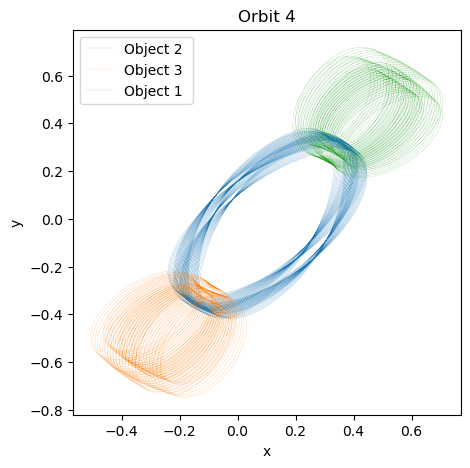

In [14]:
#Plotting the particle's paths and velocity 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.plot(Obj_2_r[:,0],Obj_2_r[:,1],label='Object 2',lw=0.1)
ax.plot(Obj_3_r[:,0],Obj_3_r[:,1],label='Object 3 ',lw=0.1)
ax.plot(Obj_1_r[:,0],Obj_1_r[:,1],label='Object 1',lw=0.1)
ax.set_title('Orbit 4')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best')
